# Practica 3

Un dataset de NOAA está almacenado en el archivo `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. Este es el dataset que utilizaremos para la práctica.

Nota: Los datos para esta práctica forman parte de un dataset perteneciente a The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones de la superficie terrestre en todo el mundo.

Cada fila en el archivo de datos corresponde a una sola observación.

Nos proporciona las siguientes variables:

- **id** : código de identificación de la estación
- **date** : fecha en formato YYYY-MM-DD (por ejemplo: 2012-01-24 = 24 de enero de 2012)
- **element** : indica el tipo de medición
    - **TMAX** : Temperatura máxima
    - **TMIN** : Temperatura mínima
- **value**: valor de la temperatura (en décimas de grados centígrados)

## Indicaciones

1. Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.
2. Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.
3. Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.
4. ¡Haz que la imagen sea agradable! Considera problemas como leyendas, etiquetas y líneas en demasía.

Los datos proporcionados están cerca de **Ann Arbor, Michigan, Estados Unidos**, y las estaciones de donde provienen los datos se muestran en el siguiente mapa.

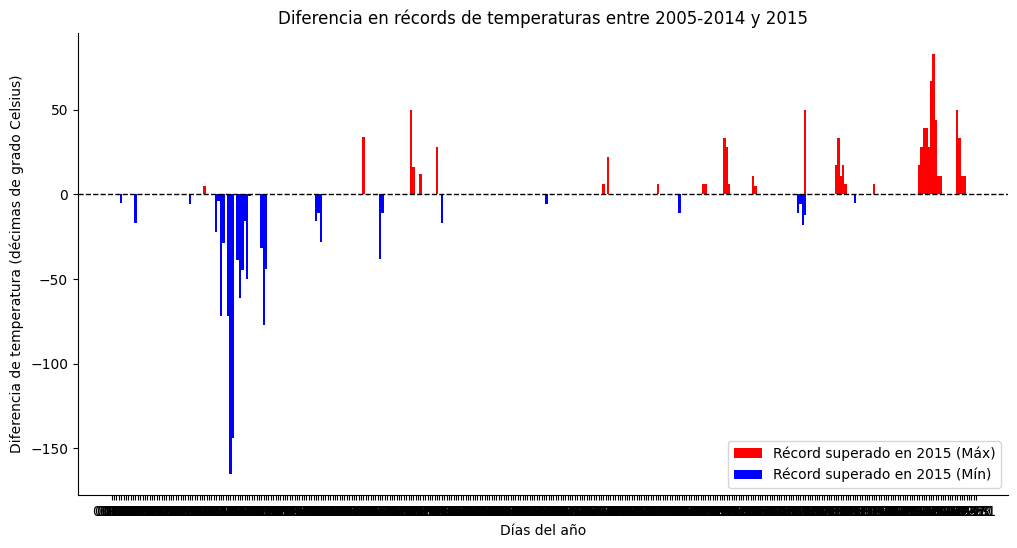

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(file_path):
    data = pd.read_csv(file_path)
    data['Date'] = pd.to_datetime(data['Date'])
    data = data[~((data['Date'].dt.month == 2) & (data['Date'].dt.day == 29))]
    return data

def get_record_temperatures(data, year_range):
    data_year_range = data[data['Date'].dt.year.isin(year_range)]
    record_high = data_year_range[data_year_range['Element'] == 'TMAX'].groupby(data_year_range['Date'].dt.strftime('%m-%d'))['Data_Value'].max()
    record_low = data_year_range[data_year_range['Element'] == 'TMIN'].groupby(data_year_range['Date'].dt.strftime('%m-%d'))['Data_Value'].min()
    return record_high, record_low

def get_exceeded_records(record_2015, record, operation):
    if operation == 'max':
        return record_2015[record_2015 > record]
    elif operation == 'min':
        return record_2015[record_2015 < record]

def plot_records(record_high, record_low, record_high_2015, record_low_2015):
    plt.figure(figsize=(12, 6))
    difference_high = get_exceeded_records(record_high_2015, record_high, 'max') - record_high
    difference_low = get_exceeded_records(record_low_2015, record_low, 'min') - record_low
    plt.bar(difference_high.index, difference_high, width=1, color='red', label='Récord superado en 2015 (Máx)')
    plt.bar(difference_low.index, difference_low, width=1, color='blue', label='Récord superado en 2015 (Mín)')
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Días del año')
    plt.ylabel('Diferencia de temperatura (décimas de grado Celsius)')
    plt.title('Diferencia en récords de temperaturas entre 2005-2014 y 2015')
    plt.legend()
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()

# Archivo CSV con los datos
file_path = '../data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'

# Cargar datos
data = load_data(file_path)

# Obtener récords de temperaturas
record_high, record_low = get_record_temperatures(data, range(2005, 2015))

# Separar los datos de 2015
data_2015 = data[data['Date'].dt.year == 2015]
record_high_2015, record_low_2015 = get_record_temperatures(data_2015, [2015])

# Graficar récords superados en 2015
plot_records(record_high, record_low, record_high_2015, record_low_2015)
